<img src="https://drive.google.com/uc?export=view&id=10mKgunAZowpvpttdYdjoDeCM2RSMGXer" width="100%">

# **Carga de Datos**
---

Este notebook realiza a través de google colaboratory el cargue de datos para el proyecto Predicción Insuficiencia Cardiaca Utilizando Técnicas de Machine Learning.

Esta desarrollado por:

- Henry Hernán Bolaños Bravo
- Wilson Ricardo Torres Morales

## **1. Datos**
---

A continuación se da una descripción general de la procedencia de los datos y el código que permite su tratamiento.


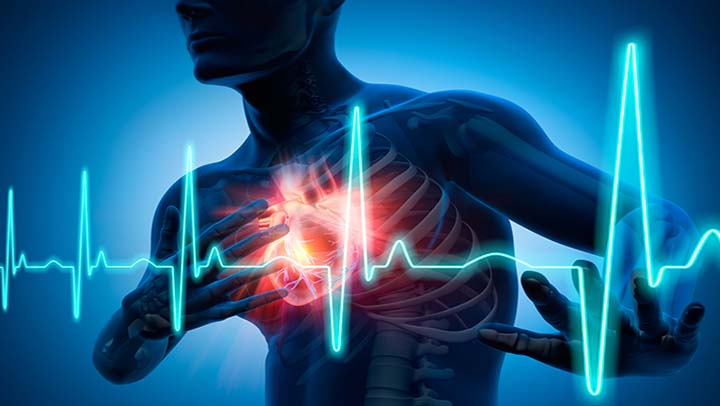

### **1.1. Origen**
---

- ¿De dónde vienen los datos?
- ¿Se usa alguna herramienta o proceso para la descarga de la información?
- ¿Qué tipo de datos estamos manejando?

**Procedencias Datos**

Los datos se obtienen del repositorio de [Datos Kaggle](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?resource=download&select=heart_failure_clinical_records_dataset.csv)
datos clinicos de insuficiencia cardíaca.

La descripción de los datos disponibles son:

  ***Datos demográficos:***

Edad

Sexo

***Datos clínicos:***

Anemia.

Creatinina_fosfoquinasa.

Diabetes.

Fracción_de_eyección.

Hipertensión.

Plaquetas.

Creatinina sérica.

Sodio sérico.


**Herramientas y Proceso de Descarga**

Directamente desde el entorno local Colab/Jupyter, el archivo CSV (/content/heart_failure_clinical_records_dataset.csv) ya está en la carpeta /content, lo que indica que está descargado allí previamente.


**Tipo Datos**
* Datos Estructurados características: (csv)

Estos son los campos que representarían cada registro clínico de insuficiencia cardíaca.


### **1.2. Carga o Adquisición de Datos**
---

A continuación se obtiene los datos que corresponden a un conjunto
 de registros clínicos de insuficiencia cardíaca

### **1.2.1. Insuficiencia Cardíaca**

En el archivo heart_failure_clinical_records_dataset.csv tenemos registros clínicos que tienen o no tienen predicción de insuficiencia cardiaca.

In [1]:
import pandas as pd
ruta_archivo = [None] * 8

# Cargar el archivo CSV desde la carpeta /content
ruta_archivo[0] = '/content/heart_failure_clinical_records_dataset.csv'
df_insuficiencia_cardiaca = pd.read_csv(ruta_archivo[0])



***Campos:***

In [2]:

# Seleccionar las columnas específicas
columnas_lista = df_insuficiencia_cardiaca.columns.tolist()
print(columnas_lista)


['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


***Muestras:***

In [3]:
print(df_insuficiencia_cardiaca.iloc[57])  # Muestra un registro del DataFrame con predicción negativa a insuficiencia cardíaca


age                             60.0
anaemia                          1.0
creatinine_phosphokinase       607.0
diabetes                         0.0
ejection_fraction               40.0
high_blood_pressure              0.0
platelets                   216000.0
serum_creatinine                 0.6
serum_sodium                   138.0
sex                              1.0
smoking                          1.0
time                            54.0
DEATH_EVENT                      0.0
Name: 57, dtype: float64


In [4]:
print(df_insuficiencia_cardiaca.iloc[55])  # Muestra un registro del DataFrame con pediccion positiva a insuficiencia cardíaca


age                             95.0
anaemia                          1.0
creatinine_phosphokinase       371.0
diabetes                         0.0
ejection_fraction               30.0
high_blood_pressure              0.0
platelets                   461000.0
serum_creatinine                 2.0
serum_sodium                   132.0
sex                              1.0
smoking                          0.0
time                            50.0
DEATH_EVENT                      1.0
Name: 55, dtype: float64


### **1.2.1.1. Descripción de  Insuficiencia Cardíaca**

***Datos:***

In [10]:
import plotly.graph_objects as go

# Crear tabla interactiva
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df_insuficiencia_cardiaca.columns),
                fill_color='#003B5C',
                font=dict(color='white'),
                align='left'),
    cells=dict(values=[df_insuficiencia_cardiaca[col] for col in df_insuficiencia_cardiaca.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title="Datos de Insuficiencia Cardíaca")

fig.write_image("Datos_Insuficiencia_Cardíaca.png")

fig.show()


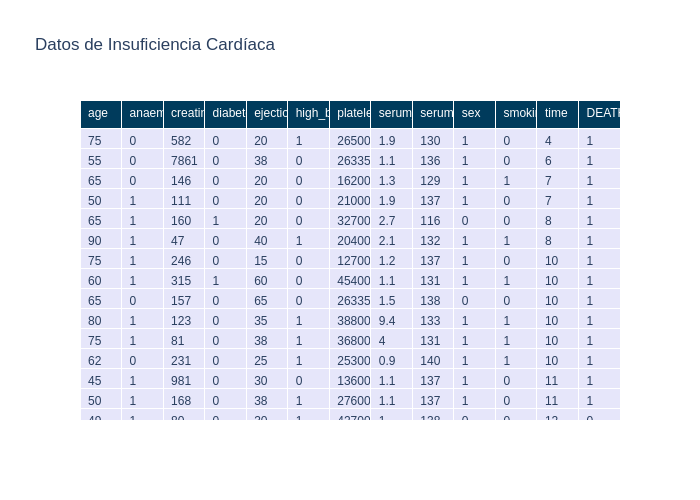


**age:** Corresponde a la edad de un paciente . Ejemplo 95 (95 años).

**anaemia:** Corresponde a si el paciente tiene anemia, que es la disminución de glóbulos rojos o hemoglobina (booleano). Ejemplo 1 Verdadero.

**creatinine_phosphokinase:** Corresponde a Creatinina fosfoquinasa, que es Nivel de la enzima CPK en la sangre (mcg/L). Ejemplo 371.

**diabetes:** Corresponde a si el paciente tiene diabetes. Ejemplo 0 Falso.

**ejection_fraction:** Correspode a fracción de eyección, que es el porcentaje de sangre que sale del corazón en cada contracción (porcentaje). Ejemplo 30%.

**high_blood_pressure:** Corresponde a si el paciente tiene hipertensión (booleano). Ejemplo 0 Falso.

**platelets:** Corresponde al número de plaquetas en la sangre (kiloplaquetas/mL). Ejemplo 461000.

**serum_creatinine:** Corresponde a sodio sérico, que es el nivel de creatinina sérica en la sangre (mg/dL). Ejemplo 2.0

**serum_sodium:** Corresponde a sodio sérico, que es el nivel de sodio sérico en la sangre (mEq/L). Ejemplo 132

**sex** Corresponde al sexo de un paicente. Ejemplo 1 Hombre.

**smoking** Corresponde a si el paciente fuma.  Ejemplo o No fuma.

**time** Corresponde a ???.  

**DEATH_EVENT** Corresponde al campo de un paciente que categoriza si el dato clínico del paciente tiene o no tiene suficiencia cardíaca. Ejemplo 1.0 Positivo insuficiencia cardiaca



### **1.2.1.2. Histograma**

A continuación se muestra la información por histograma


In [7]:
!pip install kaleido


In [8]:
import kaleido
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subplots con 12 gráficos en una fila horizontal
fig = make_subplots(
    rows=1, cols=13,
    subplot_titles=df_insuficiencia_cardiaca.columns
)

# Color azul sector salud
health_blue = "#003B5C"  # Puedes ajustar este código de color según tus preferencias

# Añadir histogramas para cada columna
for i, column in enumerate(df_insuficiencia_cardiaca.columns[:13]):  # Asegúrate de usar un máximo de 12 columnas
    fig.add_trace(
        go.Histogram(
            x=df_insuficiencia_cardiaca[column],
            name=column,
            marker_color=health_blue
        ),
        row=1, col=i+1
    )

# Ajustar diseño
fig.update_layout(
    title_text="Histogramas de columnas para datos clínicos de insuficiencia cardíaca",
    height=400,  # Altura estándar
    width=2400,  # Ancho expandido para acomodar 12 gráficos
    showlegend=False,
    template="plotly_white",  # Fondo blanco profesional
    bargap=0.1  # Fondo blanco profesional
)

fig.write_image("histogramas_insuficiencia_cardiaca.png")

# Mostrar la figura
fig.show()


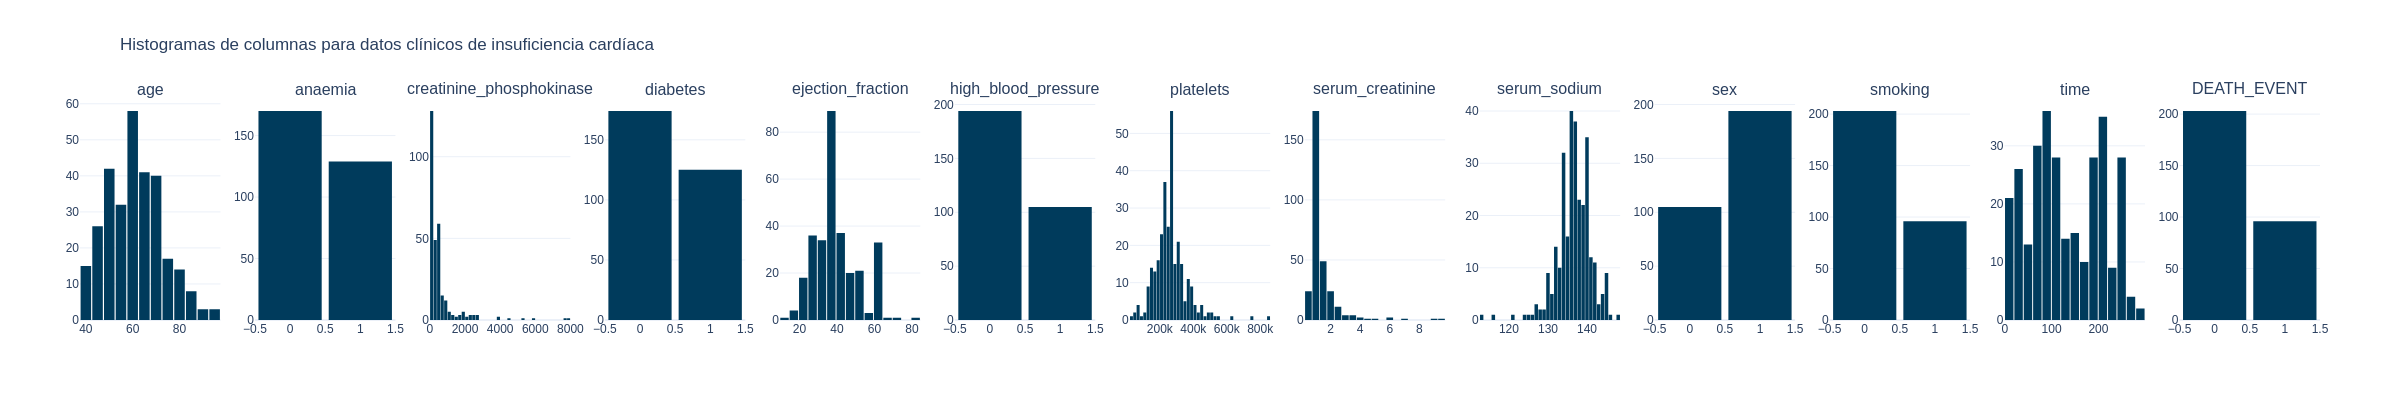

## Créditos
---

**Profesor**

- [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/)

**Asistente docente**:

- [Juan S. Lara MSc](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/)

**Diseño de imágenes:**
- [Brian Chaparro Cetina](mailto:bchaparro@unal.edu.co).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*